In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38870 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [4]:
# input_path = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

output_path = '/g/data/e14/erd561/Australia_3/'

In [5]:
%%time
latS = -80
latN = 20
lonW = 140-360
lonE = 290-360
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

tx_trans_z0_1_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=slice(lonW,lonE))
print(tx_trans_z0_1_mod_month)

tx_trans_z0_1_mod_month.load()
print(tx_trans_z0_1_mod_month)

xu_ocean = tx_trans_z0_1_mod_month.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_1_mod_month = tx_trans_z0_1_mod_month.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_1_mod_month)

tx_trans_z0_1_mod = tx_trans_z0_1_mod_month.groupby('time.year').mean('time')
print(tx_trans_z0_1_mod)

tx_trans_z0_1_mod = tx_trans_z0_1_mod.sel(year=slice(1993+60*4,2017+60*4))
print(tx_trans_z0_1_mod)

tx_trans_z0_1_mod = tx_trans_z0_1_mod.cumsum('yt_ocean')
print(tx_trans_z0_1_mod)


tx_trans_z0_1_mod_month_DP = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=0,method='nearest')
print(tx_trans_z0_1_mod_month_DP)

tx_trans_z0_1_mod_month_DP.load()
print(tx_trans_z0_1_mod_month_DP)

xu_ocean = tx_trans_z0_1_mod_month_DP.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_1_mod_month_DP = tx_trans_z0_1_mod_month_DP.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_1_mod_month_DP)

tx_trans_z0_1_mod_DP = tx_trans_z0_1_mod_month_DP.groupby('time.year').mean('time')
print(tx_trans_z0_1_mod_DP)

tx_trans_z0_1_mod_DP = tx_trans_z0_1_mod_DP.sel(year=slice(1993+60*4,2017+60*4))
print(tx_trans_z0_1_mod_DP)

tx_trans_z0_1_mod_DP = tx_trans_z0_1_mod_DP.cumsum('yt_ocean')
print(tx_trans_z0_1_mod_DP)

tx_trans_z0_1_mod_DP = tx_trans_z0_1_mod_DP.sel(yt_ocean=20,method='nearest')
print(tx_trans_z0_1_mod_DP)

tx_trans_z0_1_mod = (-tx_trans_z0_1_mod + tx_trans_z0_1_mod_DP)/1e6/1036

1deg_jra55v13_iaf_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 186, xu_ocean: 151)>
dask.array<getitem, shape=(3600, 186, 151), dtype=float32, chunksize=(1, 186, 151), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -220.0 -219.0 -218.0 ... -72.0 -71.0 -70.0
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 17.85 18.59 19.36
  * time      (time) object 1958-01-16 12:00:00 ... 2257-12-16 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 186, xu_ocean: 151)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,    

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'tx_trans_int_z' (year: 300, yt_ocean: 186, xu_ocean: 151)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [-1.4589768e+09, -1.4395443e+09, -1.6148835e+09, ...,
          0.0000000e+00,            nan,  2.4655605e+08],
        [-1.1069997e+09, -1.1901042e+09, -1.3783572e+09, ...,
          0.0000000e+00,            nan,            nan],
        [-1.2857294e+09, -1.3536742e+09, -1.4995308e+09, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
     

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 186)>
dask.array<getitem, shape=(3600, 186), dtype=float32, chunksize=(1, 186), chunktype=numpy.ndarray>
Coordinates:
    xu_ocean  float64 0.0
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 17.85 18.59 19.36
  * time      (time) object 1958-01-16 12:00:00 ... 2257-12-16 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 186)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xu_ocean  float64 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'tx_trans_int_z' (year: 300, yt_ocean: 186)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xu_ocean  float64 360.0
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 17.85 18.59 19.36
  * year      (year) int64 1958 1959 1960 1961 1962 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'tx_trans_int_z' (year: 25, yt_ocean: 186)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xu_ocean  float64 360.0
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.3

In [6]:
year = tx_trans_z0_1_mod.year
lat_1_mod = tx_trans_z0_1_mod.yt_ocean
lon_1_mod = tx_trans_z0_1_mod.xu_ocean

tx_trans_z0_1_trans_mod = tx_trans_z0_1_mod
print(np.shape(tx_trans_z0_1_trans_mod))
tx_trans_z0_1_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='tx_trans_z0_1')
tx_trans_z0_1_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='tx_trans_z0_1')
tx_trans_z0_1_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='tx_trans_z0_1')
for iid, i in enumerate(lat_1_mod):
    for jid, j in enumerate(lon_1_mod):
        tx_trans_z0_1_slope_mod[iid, jid], _, _, tx_trans_z0_1_p_value_mod[iid, jid], tx_trans_z0_1_std_err_mod[iid, jid] = \
        stats.linregress(year, tx_trans_z0_1_trans_mod[:, iid, jid])
    print('lat_1_mod ' + str(np.array(i)))
print(tx_trans_z0_1_slope_mod)

(25, 186, 151)
lat_1_mod -77.87662337662337
lat_1_mod -77.62971340045422
lat_1_mod -77.38170670967813
lat_1_mod -77.13229193169715
lat_1_mod -76.88053325031572
lat_1_mod -76.62612553775392
lat_1_mod -76.36814128806307
lat_1_mod -76.1062857353073
lat_1_mod -75.8396437697329
lat_1_mod -75.5679350353177
lat_1_mod -75.29026082195642
lat_1_mod -75.0063591357146
lat_1_mod -74.71535156045195
lat_1_mod -74.41699829429905
lat_1_mod -74.11044497434412
lat_1_mod -73.7954776730756
lat_1_mod -73.47126968000356
lat_1_mod -73.13763645207749
lat_1_mod -72.79378234640026
lat_1_mod -72.43955551893697
lat_1_mod -72.07419460280451
lat_1_mod -71.6975835499315
lat_1_mod -71.30899824976896
lat_1_mod -70.9083613089407
lat_1_mod -70.49498860561721
lat_1_mod -70.06884400260856
lat_1_mod -69.6292858330716
lat_1_mod -69.17632154294074
lat_1_mod -68.70935410409521
lat_1_mod -68.22843658249317
lat_1_mod -67.73301847540898
lat_1_mod -67.2232002021303
lat_1_mod -66.69847936238045
lat_1_mod -66.15900514695375
lat_1_mo

In [21]:
%%time
latS = -80
latN = 20
lonW = 140-360
lonE = 290-360
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

tx_trans_z0_025_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=slice(lonW,lonE))
print(tx_trans_z0_025_mod_month)

tx_trans_z0_025_mod_month.load()
print(tx_trans_z0_025_mod_month)

xu_ocean = tx_trans_z0_025_mod_month.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_025_mod_month = tx_trans_z0_025_mod_month.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_025_mod_month)

tx_trans_z0_025_mod = tx_trans_z0_025_mod_month.groupby('time.year').mean('time')
print(tx_trans_z0_025_mod)

tx_trans_z0_025_mod = tx_trans_z0_025_mod.sel(year=slice(1993+60*4,2017+60*4))
print(tx_trans_z0_025_mod)

tx_trans_z0_025_mod = tx_trans_z0_025_mod.cumsum('yt_ocean')
print(tx_trans_z0_025_mod)

tx_trans_z0_025_mod_month_DP = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=0,method='nearest')
print(tx_trans_z0_025_mod_month_DP)

tx_trans_z0_025_mod_month_DP.load()
print(tx_trans_z0_025_mod_month_DP)

xu_ocean = tx_trans_z0_025_mod_month_DP.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_025_mod_month_DP = tx_trans_z0_025_mod_month_DP.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_025_mod_month_DP)

tx_trans_z0_025_mod_DP = tx_trans_z0_025_mod_month_DP.groupby('time.year').mean('time')
print(tx_trans_z0_025_mod_DP)

tx_trans_z0_025_mod_DP = tx_trans_z0_025_mod_DP.sel(year=slice(1993+60*4,2017+60*4))
print(tx_trans_z0_025_mod_DP)

tx_trans_z0_025_mod_DP = tx_trans_z0_025_mod_DP.cumsum('yt_ocean')
print(tx_trans_z0_025_mod_DP)

tx_trans_z0_025_mod_DP = tx_trans_z0_025_mod_DP.sel(yt_ocean=20,method='nearest')
print(tx_trans_z0_025_mod_DP)

tx_trans_z0_025_mod = (-tx_trans_z0_025_mod + tx_trans_z0_025_mod_DP)/1e6/1036

025deg_jra55v13_iaf_gmredi6


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 569, xu_ocean: 601)>
dask.array<getitem, shape=(3600, 569, 601), dtype=float32, chunksize=(1, 529, 481), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -220.0 -219.8 -219.5 ... -70.5 -70.25 -70.0
  * yt_ocean  (yt_ocean) float64 -79.92 -79.81 -79.7 -79.6 ... 19.49 19.72 19.96
  * time      (time) object 1958-01-14 12:00:00 ... 2257-12-14 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 569, xu_ocean: 601)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,         

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'tx_trans_int_z' (year: 300, yt_ocean: 569, xu_ocean: 601)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-5.91816896e+08, -6.39582912e+08, -6.81585728e+08, ...,
                     nan,             nan,             nan],
        [-5.07589920e+08, -5.61249856e+08, -6.81155584e+08, ...,
                     nan,  9.38974080e+07, -2.45631840e+07],
        [-4.06701664e+08, -4.07634656e+08, -4.38290912e+08, ...,
         -2.94261600e+08, -3.52847744e+08, -3.60753248e+08]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,

<xarray.DataArray 'tx_trans_int_z' (year: 25, yt_ocean: 569, xu_ocean: 601)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.47592462e+11, 1.47389809e+11, 1.47404554e+11, ...,
         1.42850490e+11, 1.42849802e+11, 1.42849442e+11],
        [1.46887049e+11, 1.46721030e+11, 1.46625954e+11, ...,
         1.42850490e+11, 1.42929674e+11, 1.42810825e+11],
        [1.46086674e+11, 1.45987699e+11, 1.45957372e+11, ...,
         1.42445167e+11, 1.42513865e+11, 1.42455308e+11]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
      

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 569)>
dask.array<getitem, shape=(3600, 569), dtype=float32, chunksize=(1, 529), chunktype=numpy.ndarray>
Coordinates:
    xu_ocean  float64 0.0
  * yt_ocean  (yt_ocean) float64 -79.92 -79.81 -79.7 -79.6 ... 19.49 19.72 19.96
  * time      (time) object 1958-01-14 12:00:00 ... 2257-12-14 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 3600, yt_ocean: 569)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xu_ocean  flo

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 2min 8s, sys: 34.9 s, total: 2min 43s
Wall time: 3min 47s


In [22]:
lat_025_mod = tx_trans_z0_025_mod.yt_ocean
lon_025_mod = tx_trans_z0_025_mod.xu_ocean

tx_trans_z0_025_trans_mod = tx_trans_z0_025_mod
print(np.shape(tx_trans_z0_025_trans_mod))
tx_trans_z0_025_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='tx_trans_z0_025')
tx_trans_z0_025_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='tx_trans_z0_025')
tx_trans_z0_025_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='tx_trans_z0_025')
for iid, i in enumerate(lat_025_mod):
    for jid, j in enumerate(lon_025_mod):
        tx_trans_z0_025_slope_mod[iid, jid], _, _, tx_trans_z0_025_p_value_mod[iid, jid], tx_trans_z0_025_std_err_mod[iid, jid] = \
        stats.linregress(year, tx_trans_z0_025_trans_mod[:, iid, jid])
    print('lat_025_mod ' + str(np.array(i)))
print(tx_trans_z0_025_slope_mod)

(25, 569, 601)
lat_025_mod -79.91541635258267
lat_025_mod -79.80981776337775
lat_025_mod -79.70421917417283
lat_025_mod -79.59862058496792
lat_025_mod -79.493021995763
lat_025_mod -79.38742340655809
lat_025_mod -79.28182481735317
lat_025_mod -79.17622622814825
lat_025_mod -79.07062763894334
lat_025_mod -78.96502904973842
lat_025_mod -78.8594304605335
lat_025_mod -78.75383187132859
lat_025_mod -78.64823328212367
lat_025_mod -78.54263469291875
lat_025_mod -78.43703610371384
lat_025_mod -78.33143751450892
lat_025_mod -78.225838925304
lat_025_mod -78.12024033609909
lat_025_mod -78.01464174689417
lat_025_mod -77.90904315768925
lat_025_mod -77.80344456848434
lat_025_mod -77.69784597927942
lat_025_mod -77.5922473900745
lat_025_mod -77.48664880086959
lat_025_mod -77.38105021166467
lat_025_mod -77.27545162245976
lat_025_mod -77.16985303325484
lat_025_mod -77.06425444404992
lat_025_mod -76.958655854845
lat_025_mod -76.85305726564009
lat_025_mod -76.74745867643517
lat_025_mod -76.64186008723026
l

lat_025_mod -48.51019821855441
lat_025_mod -48.34430677060639
lat_025_mod -48.17787182793927
lat_025_mod -48.01089660539825
lat_025_mod -47.84337719706126
lat_025_mod -47.67531682924737
lat_025_mod -47.50671165403836
lat_025_mod -47.33756491026068
lat_025_mod -47.16787280849464
lat_025_mod -46.99763860110834
lat_025_mod -46.82685855767941
lat_025_mod -46.655535945152195
lat_025_mod -46.48366709260396
lat_025_mod -46.31125528258984
lat_025_mod -46.1382969041921
lat_025_mod -45.96479525661064
lat_025_mod -45.79074678944065
lat_025_mod -45.6161548195597
lat_025_mod -45.441015857585846
lat_025_mod -45.26533323910572
lat_025_mod -45.089103536271594
lat_025_mod -44.91233010440849
lat_025_mod -44.735009577715175
lat_025_mod -44.557145332281756
lat_025_mod -44.37873406486607
lat_025_mod -44.19977917334686
lat_025_mod -44.020277417553295
lat_025_mod -43.84023221817254
lat_025_mod -43.65964039861644
lat_025_mod -43.47850540339607
lat_025_mod -43.29682412001572
lat_025_mod -43.1146000178209
lat_0

lat_025_mod 10.31879437379502
lat_025_mod 10.564654234066332
lat_025_mod 10.810318694641733
lat_025_mod 11.055780978228533
lat_025_mod 11.301039171610363
lat_025_mod 11.54608653048691
lat_025_mod 11.790921183462055
lat_025_mod 12.035536420458884
lat_025_mod 12.279930413485692
lat_025_mod 12.524096487886421
lat_025_mod 12.768032860624551
lat_025_mod 13.011732893627801
lat_025_mod 13.255194850331272
lat_025_mod 13.498412130373907
lat_025_mod 13.741383045143644
lat_025_mod 13.984101033081737
lat_025_mod 14.22656445497414
lat_025_mod 14.468766789118314
lat_025_mod 14.710706447106602
lat_025_mod 14.952376948108617
lat_025_mod 15.193776755893923
lat_025_mod 15.434899431481558
lat_025_mod 15.675743492150964
lat_025_mod 15.916302541708545
lat_025_mod 16.156575152237487
lat_025_mod 16.396554971229563
lat_025_mod 16.636240626826247
lat_025_mod 16.875625811062203
lat_025_mod 17.114709209351908
lat_025_mod 17.35348455908949
lat_025_mod 17.591950604136887
lat_025_mod 17.830101128022857
lat_025_mod 

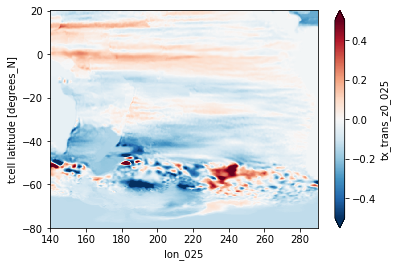

In [25]:
tx_trans_z0_025_slope_mod.plot(vmax=0.5)

In [31]:
%%time
latS = -80
latN = 20
lonW = 140-360
lonE = 290-360
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

tx_trans_z0_01_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=slice(lonW,lonE))
print(tx_trans_z0_01_mod_month)

tx_trans_z0_01_mod_month.load()
print(tx_trans_z0_01_mod_month)

xu_ocean = tx_trans_z0_01_mod_month.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_01_mod_month = tx_trans_z0_01_mod_month.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_01_mod_month)

tx_trans_z0_01_mod = tx_trans_z0_01_mod_month.groupby('time.year').mean('time')
print(tx_trans_z0_01_mod)

tx_trans_z0_01_mod = tx_trans_z0_01_mod.sel(year=slice(1993,2017))
print(tx_trans_z0_01_mod)

tx_trans_z0_01_mod = tx_trans_z0_01_mod.cumsum('yt_ocean')
print(tx_trans_z0_01_mod)

tx_trans_z0_01_mod_month_DP = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean_month.nc',
                                     variable='tx_trans_int_z').\
sel(yt_ocean=slice(latS,latN)).\
sel(xu_ocean=0,method='nearest')
print(tx_trans_z0_01_mod_month_DP)

tx_trans_z0_01_mod_month_DP.load()
print(tx_trans_z0_01_mod_month_DP)

xu_ocean = tx_trans_z0_01_mod_month_DP.xu_ocean
xu_ocean_corrected = xu_ocean + 360
tx_trans_z0_01_mod_month_DP = tx_trans_z0_01_mod_month_DP.assign_coords(xu_ocean=xu_ocean_corrected)
print(tx_trans_z0_01_mod_month_DP)

tx_trans_z0_01_mod_DP = tx_trans_z0_01_mod_month_DP.groupby('time.year').mean('time')
print(tx_trans_z0_01_mod_DP)

tx_trans_z0_01_mod_DP = tx_trans_z0_01_mod_DP.sel(year=slice(1993,2017))
print(tx_trans_z0_01_mod_DP)

tx_trans_z0_01_mod_DP = tx_trans_z0_01_mod_DP.cumsum('yt_ocean')
print(tx_trans_z0_01_mod_DP)

tx_trans_z0_01_mod_DP = tx_trans_z0_01_mod_DP.sel(yt_ocean=20,method='nearest')
print(tx_trans_z0_01_mod_DP)

tx_trans_z0_01_mod = (-tx_trans_z0_01_mod + tx_trans_z0_01_mod_DP)/1e6/1036

01deg_jra55v13_iaf


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 396, yt_ocean: 1422, xu_ocean: 1501)>
dask.array<getitem, shape=(396, 1422, 1501), dtype=float32, chunksize=(1, 675, 900), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -220.0 -219.9 -219.8 ... -70.2 -70.1 -70.0
  * yt_ocean  (yt_ocean) float64 -79.97 -79.93 -79.88 ... 19.75 19.84 19.94
  * time      (time) object 1985-01-14 12:00:00 ... 2017-12-14 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 396, yt_ocean: 1422, xu_ocean: 1501)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan, 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'tx_trans_int_z' (year: 33, yt_ocean: 1422, xu_ocean: 1501)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 2.34814400e+08,  2.27485696e+08,  1.96320176e+08, ...,
         -4.12685000e+07, -8.14462160e+07, -4.71171720e+07],
        [ 1.46293952e+08,  1.08692224e+08,  6.15678040e+07, ...,
         -2.41615232e+08, -2.10616944e+08, -1.06649064e+08],
        [-4.25206680e+07, -5.73770080e+07, -5.09124920e+07, ...,
         -3.43729696e+08, -2.53188944e+08, -1.83143424e+08]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan

<xarray.DataArray 'tx_trans_int_z' (year: 25, yt_ocean: 1422, xu_ocean: 1501)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.27826174e+11, 1.27826428e+11, 1.27804391e+11, ...,
         1.21747390e+11, 1.21800450e+11, 1.21947693e+11],
        [1.27104123e+11, 1.27056306e+11, 1.26983782e+11, ...,
         1.21821225e+11, 1.22008379e+11, 1.22371719e+11],
        [1.26303142e+11, 1.26235230e+11, 1.26157210e+11, ...,
         1.22111574e+11, 1.22402349e+11, 1.22796933e+11]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
    

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'tx_trans_int_z' (time: 396, yt_ocean: 1422)>
dask.array<getitem, shape=(396, 1422), dtype=float32, chunksize=(1, 675), chunktype=numpy.ndarray>
Coordinates:
    xu_ocean  float64 -4.843e-12
  * yt_ocean  (yt_ocean) float64 -79.97 -79.93 -79.88 ... 19.75 19.84 19.94
  * time      (time) object 1985-01-14 12:00:00 ... 2017-12-14 12:00:00
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_t
<xarray.DataArray 'tx_trans_int_z' (time: 396, yt_ocean: 1422)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xu_ocean  f

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 49.1 s, sys: 27.9 s, total: 1min 17s
Wall time: 2min 11s


In [ ]:
year = tx_trans_z0_01_mod.year
lat_01_mod = tx_trans_z0_01_mod.yt_ocean
lon_01_mod = tx_trans_z0_01_mod.xu_ocean

tx_trans_z0_01_trans_mod = tx_trans_z0_01_mod
print(np.shape(tx_trans_z0_01_trans_mod))
tx_trans_z0_01_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='tx_trans_z0_01')
tx_trans_z0_01_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='tx_trans_z0_01')
tx_trans_z0_01_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='tx_trans_z0_01')
for iid, i in enumerate(lat_01_mod):
    for jid, j in enumerate(lon_01_mod):
        tx_trans_z0_01_slope_mod[iid, jid], _, _, tx_trans_z0_01_p_value_mod[iid, jid], tx_trans_z0_01_std_err_mod[iid, jid] = \
        stats.linregress(year, tx_trans_z0_01_trans_mod[:, iid, jid])
    print('lat_01_mod ' + str(np.array(i)))
print(tx_trans_z0_01_slope_mod)

(25, 1422, 1501)
lat_01_mod -79.96816911008175
lat_01_mod -79.92592975570126
lat_01_mod -79.88369040132078
lat_01_mod -79.84145104694029
lat_01_mod -79.79921169255981
lat_01_mod -79.75697233817932
lat_01_mod -79.71473298379884
lat_01_mod -79.67249362941835
lat_01_mod -79.63025427503787
lat_01_mod -79.58801492065739
lat_01_mod -79.5457755662769
lat_01_mod -79.50353621189642
lat_01_mod -79.46129685751593
lat_01_mod -79.41905750313545
lat_01_mod -79.37681814875496
lat_01_mod -79.33457879437448
lat_01_mod -79.292339439994
lat_01_mod -79.25010008561351
lat_01_mod -79.20786073123303
lat_01_mod -79.16562137685254
lat_01_mod -79.12338202247206
lat_01_mod -79.08114266809157
lat_01_mod -79.03890331371109
lat_01_mod -78.9966639593306
lat_01_mod -78.95442460495012
lat_01_mod -78.91218525056964
lat_01_mod -78.86994589618915
lat_01_mod -78.82770654180867
lat_01_mod -78.78546718742818
lat_01_mod -78.7432278330477
lat_01_mod -78.70098847866721
lat_01_mod -78.65874912428673
lat_01_mod -78.6165097699062

In [ ]:
# tx_trans_z0_1_mod_xr = xr.DataArray(tx_trans_z0_1_mod.transpose('yt_ocean', 'xu_ocean', 'year'), name='tx_trans_z0_1_mod',
#                         coords=[lat_1_mod, lon_1_mod, year], 
#                         dims=['yt_ocean', 'xu_ocean', 'year'])
# print(tx_trans_z0_1_mod_xr)
# tx_trans_z0_1_mod_xr.to_netcdf(output_path + 'tx_trans_z0_1_mod.nc')

# tx_trans_z0_1_slope_mod_xr = xr.DataArray(tx_trans_z0_1_slope_mod, name='tx_trans_z0_1_slope_mod',
#                         coords=[lat_1_mod, lon_1_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_1_slope_mod_xr)
# tx_trans_z0_1_slope_mod_xr.to_netcdf(output_path + 'tx_trans_z0_1_slope_mod.nc')

# tx_trans_z0_1_p_value_mod_xr = xr.DataArray(tx_trans_z0_1_p_value_mod, name='tx_trans_z0_1_p_value_mod',
#                         coords=[lat_1_mod, lon_1_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_1_p_value_mod_xr)
# tx_trans_z0_1_p_value_mod_xr.to_netcdf(output_path + 'tx_trans_z0_1_p_value_mod.nc')

# tx_trans_z0_1_std_err_mod_xr = xr.DataArray(tx_trans_z0_1_std_err_mod, name='tx_trans_z0_1_std_err_mod',
#                         coords=[lat_1_mod, lon_1_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_1_std_err_mod_xr)
# tx_trans_z0_1_std_err_mod_xr.to_netcdf(output_path + 'tx_trans_z0_1_std_err_mod.nc')



# tx_trans_z0_025_mod_xr = xr.DataArray(tx_trans_z0_025_mod.transpose('yt_ocean', 'xu_ocean', 'year'), name='tx_trans_z0_025_mod',
#                         coords=[lat_025_mod, lon_025_mod, year], 
#                         dims=['yt_ocean', 'xu_ocean', 'year'])
# print(tx_trans_z0_025_mod_xr)
# tx_trans_z0_025_mod_xr.to_netcdf(output_path + 'tx_trans_z0_025_mod.nc')

# tx_trans_z0_025_slope_mod_xr = xr.DataArray(tx_trans_z0_025_slope_mod, name='tx_trans_z0_025_slope_mod',
#                         coords=[lat_025_mod, lon_025_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_025_slope_mod_xr)
# tx_trans_z0_025_slope_mod_xr.to_netcdf(output_path + 'tx_trans_z0_025_slope_mod.nc')

# tx_trans_z0_025_p_value_mod_xr = xr.DataArray(tx_trans_z0_025_p_value_mod, name='tx_trans_z0_025_p_value_mod',
#                         coords=[lat_025_mod, lon_025_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_025_p_value_mod_xr)
# tx_trans_z0_025_p_value_mod_xr.to_netcdf(output_path + 'tx_trans_z0_025_p_value_mod.nc')

# tx_trans_z0_025_std_err_mod_xr = xr.DataArray(tx_trans_z0_025_std_err_mod, name='tx_trans_z0_025_std_err_mod',
#                         coords=[lat_025_mod, lon_025_mod], 
#                         dims=['yt_ocean', 'xu_ocean'])
# print(tx_trans_z0_025_std_err_mod_xr)
# tx_trans_z0_025_std_err_mod_xr.to_netcdf(output_path + 'tx_trans_z0_025_std_err_mod.nc')



tx_trans_z0_01_mod_xr = xr.DataArray(tx_trans_z0_01_mod.transpose('yt_ocean', 'xu_ocean', 'year'), name='tx_trans_z0_01_mod',
                        coords=[lat_01_mod, lon_01_mod, year], 
                        dims=['yt_ocean', 'xu_ocean', 'year'])
print(tx_trans_z0_01_mod_xr)
tx_trans_z0_01_mod_xr.to_netcdf(output_path + 'tx_trans_z0_01_mod.nc')

tx_trans_z0_01_slope_mod_xr = xr.DataArray(tx_trans_z0_01_slope_mod, name='tx_trans_z0_01_slope_mod',
                        coords=[lat_01_mod, lon_01_mod], 
                        dims=['yt_ocean', 'xu_ocean'])
print(tx_trans_z0_01_slope_mod_xr)
tx_trans_z0_01_slope_mod_xr.to_netcdf(output_path + 'tx_trans_z0_01_slope_mod.nc')

tx_trans_z0_01_p_value_mod_xr = xr.DataArray(tx_trans_z0_01_p_value_mod, name='tx_trans_z0_01_p_value_mod',
                        coords=[lat_01_mod, lon_01_mod], 
                        dims=['yt_ocean', 'xu_ocean'])
print(tx_trans_z0_01_p_value_mod_xr)
tx_trans_z0_01_p_value_mod_xr.to_netcdf(output_path + 'tx_trans_z0_01_p_value_mod.nc')

tx_trans_z0_01_std_err_mod_xr = xr.DataArray(tx_trans_z0_01_std_err_mod, name='tx_trans_z0_01_std_err_mod',
                        coords=[lat_01_mod, lon_01_mod], 
                        dims=['yt_ocean', 'xu_ocean'])
print(tx_trans_z0_01_std_err_mod_xr)
tx_trans_z0_01_std_err_mod_xr.to_netcdf(output_path + 'tx_trans_z0_01_std_err_mod.nc')